## Import

In [4]:
# pip install missingno

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import plotly.express as px

import missingno as msno

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Load Data

In [7]:
train_df = pd.read_json('../data/train.json')
test_df = pd.read_json('../data/test.json')

In [8]:
train_df.shape

(14271, 23)

In [9]:
train_df.columns

Index(['id', 'province', 'district', 'subdistrict', 'address', 'property_type',
       'total_units', 'bedrooms', 'baths', 'floor_area', 'floor_level',
       'land_area', 'latitude', 'longitude', 'nearby_stations',
       'nearby_station_distance', 'nearby_bus_stops', 'nearby_supermarkets',
       'nearby_shops', 'year_built', 'month_built', 'facilities', 'price'],
      dtype='object')

In [10]:
test_df.columns

Index(['id', 'province', 'district', 'subdistrict', 'address', 'property_type',
       'total_units', 'bedrooms', 'baths', 'floor_area', 'floor_level',
       'land_area', 'latitude', 'longitude', 'nearby_stations',
       'nearby_station_distance', 'nearby_bus_stops', 'nearby_supermarkets',
       'nearby_shops', 'year_built', 'month_built', 'facilities'],
      dtype='object')

In [11]:
train_df['is_train'] = 1
test_df['is_train'] = 0

In [12]:
df = pd.concat([train_df, test_df])

In [13]:
df

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price,is_train
0,8448321,Bangkok,Watthana,Phra Khanong Nuea,"36 Soi Sukhumvit 63, Ekamai Road",Condo,273.0,2.0,2.0,66,...,2,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",NaN,16.0,20,2011,June,"[Car Park, Community Garden, CCTV, Fitness cor...",8500000.0,1
1,10936325,Bangkok,Watthana,Khlong Toei Nuea,31 สุขุมวิท,Condo,74.0,1.0,1.0,49,...,3,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...",NaN,11.0,20,2012,September,"[CCTV, Fitness corner, 24 hours security, Swim...",5900000.0,1
2,10927931,Bangkok,Khlong Toei,Khlong Tan,"68 Sukhumvit 24 Alley, Khong Tan",Condo,940.0,1.0,1.0,34,...,2,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...",NaN,20.0,20,2017,January,"[Car Park, Clubhouse, Community Garden, CCTV, ...",6290000.0,1
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,NaN,3.0,3.0,170,...,0,None,NaN,2.0,4,0,None,"[Covered car park, Playground, 24 hours securi...",8900000.0,1
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,NaN,3.0,2.0,120,...,1,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",NaN,6.0,15,0,None,"[Covered car park, 24 hours security]",2390000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,10889363,Bangkok,Bang Rak,Maha Phruettharam,660-662 Rama 4 Road,Condo,1598.0,1.0,1.0,33,...,2,"[[BL27 Sam Yan MRT, 410], [S2 Sala Daeng BTS, ...",NaN,18.0,20,2016,September,"[Amphitheatre, Covered car park, Community Gar...",NaN,0
2496,10975839,Bangkok,Sathon,Thung Maha Mek,88 Narathiwatratchanakharin Road,Condo,493.0,1.0,1.0,65,...,3,"[[B1 Sathorn BRT, 180], [B2 Arkan Songkhro BRT...",20.0,20.0,20,2009,July,"[Covered car park, CCTV, Fitness corner, Sauna...",NaN,0
2497,10986832,Bangkok,Bang Phlat,Bang Yi Khan,"1521 Soi Arun Amarin 53, Arun Amarin Road",Condo,1121.0,1.0,1.0,42,...,1,"[[BL05 Bang Yi Khan MRT, 910]]",NaN,5.0,7,2009,January,"[Car Park, Community Garden, CCTV, Fitness cor...",NaN,0
2498,10687627,Samut Prakan,Mueang Samut Prakan,Samrong Nuea,Thang Rotfai Sai Kao Road,Condo,719.0,1.0,1.0,28,...,1,"[[E15 Samrong BTS, 800]]",19.0,13.0,20,2016,December,"[Covered car park, CCTV, Fitness corner, 24 ho...",NaN,0


In [14]:
df[(df['property_type'] == 'Condo') & (df['floor_level'].isnull())]

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price,is_train
17,10906912,Bangkok,Suan Luang,Suan Luang,Ramkhamhaeng Road,Condo,1003.0,1.0,1.0,23,...,1,"[[A5 Ramkhamhaeng Airport Link, 390]]",NaN,9.0,8,2018,January,"[BBQ pits, Car Park, Covered car park, CCTV, F...",1780000.0,1
18,10540762,Bangkok,Watthana,Khlong Tan Nuea,32/2 Sukhumvit 39 Road,Condo,135.0,1.0,1.0,44,...,0,None,20.0,18.0,20,2015,August,"[Car Park, Covered car park, CCTV, Fitness cor...",6300000.0,1
19,10980009,Bangkok,Bang Rak,Si Phraya,Si Phraya Road,Condo,384.0,1.0,1.0,52,...,1,"[[BL27 Sam Yan MRT, 830]]",NaN,13.0,20,2023,None,"[Car Park, CCTV, Fitness corner, Jacuzzi, Meet...",5950000.0,1
25,10848712,Bangkok,Watthana,Khlong Tan Nuea,175-179 Soi Sukhumvit 39 Sukhumvit Road,Condo,500.0,2.0,1.0,119,...,0,None,20.0,12.0,13,1994,April,"[Car Park, CCTV, Gymnasium room, Lift lobby, 2...",7200000.0,1
28,10114191,Bangkok,Watthana,Khlong Tan Nuea,Sukhumvit 61 Road,Condo,168.0,1.0,1.0,43,...,2,"[[E7 Ekkamai BTS, 410], [E6 Thong Lo BTS, 590]]",NaN,19.0,20,2013,February,"[Car Park, CCTV, Fitness corner, Function room...",6200000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,11033468,Bangkok,Chatuchak,Chom Phon,พลโยธิน 18,Condo,NaN,1.0,1.0,41,...,3,"[[BL12 Kamphaeng Phet MRT, 290], [N7 Saphan Kw...",NaN,13.0,20,2013,July,"[CCTV, 24 hours security, Swimming pool]",NaN,0
2483,10963410,Bangkok,Ratchathewi,Thanon Phaya Thai,31 Phayatai Road,Condo,213.0,1.0,1.0,44,...,3,"[[N3 Victory Monument BTS, 200], [A8 Phaya Tha...",NaN,12.0,20,2014,July,"[Car Park, Community Garden, CCTV, Fitness cor...",NaN,0
2484,10948078,Samut Prakan,Mueang Samut Prakan,Samrong Nuea,577 Tambon Samrong Nua,Condo,1210.0,2.0,2.0,66,...,0,None,6.0,9.0,7,2008,December,"[Car Park, Covered car park, CCTV, Gymnasium r...",NaN,0
2485,10998660,Bangkok,Watthana,Khlong Toei Nuea,Asok Montri Rd,Condo,213.0,1.0,1.0,50,...,3,"[[BL22 Sukhumvit MRT, 550], [BL21 Phetchaburi ...",NaN,10.0,20,2013,January,"[Covered car park, CCTV, Fitness corner, 24 ho...",NaN,0


In [15]:
# Ignore subdistrict, address, total_units, lat, long

# floor level - Detached House, Townhouse set to 0, || Condo set to mean or median?
# land area - Condo set to 0, || Detached House, Townhouse set to mean or median?

# nearby_stations
# nearby_station_distance - category - no station, < 500m, < 1km,  

# nearby_super_markets: null = 0, other = 1

# year_built - 0 set to mean or median? || 0 = very old? 1-2 year, ... || year_built >>> aging, category very old, old, ...


# Remove condo id 10732863, 10924434, 10894468
# 10598898 8 beds, 8 bathrooms
# 10155691 1 beds, 4 bathrooms

# 0 baths > 1 baths
# 0 beds > 1 beds

In [16]:
df.groupby(['property_type','is_train']).agg(lambda group: group.isnull().mean()).T

property_type               Condo           Detached House            \
is_train                        0         1              0         1   
id                       0.000000  0.000000       0.000000  0.000000   
province                 0.000000  0.000000       0.000000  0.000000   
district                 0.000000  0.000000       0.000000  0.000000   
subdistrict              0.001833  0.001195       0.000000  0.000000   
address                  0.000000  0.000000       0.000000  0.000000   
total_units              0.018937  0.018792       0.674352  0.655141   
bedrooms                 0.003665  0.002281       0.005764  0.005071   
baths                    0.004276  0.002064       0.005764  0.003688   
floor_area               0.000000  0.000000       0.000000  0.000000   
floor_level              0.216860  0.201825       0.876081  0.850622   
land_area                1.000000  1.000000       0.031700  0.025357   
latitude                 0.000000  0.000000       0.000000  0.000000   
longitude                0.000000  0.000000       0.000000  0.000000   
nearby_stations          0.000000  0.000000       0.000000  0.000000   
nearby_station_distance  0.266952  0.264827       0.933718  0.936837   
nearby_bus_stops         0.652413  0.646426       0.463977  0.457815   
nearby_supermarkets      0.011607  0.005648       0.100865  0.090364   
nearby_shops             0.000000  0.000000       0.000000  0.000000   
year_built               0.000000  0.000000       0.000000  0.000000   
month_built              0.091631  0.096567       0.979827  0.972799   
facilities               0.000000  0.000000       0.000000  0.000000   
price                    1.000000  0.000000       1.000000  0.000000   

property_type           Townhouse            
is_train                        0         1  
id                       0.000000  0.000000  
province                 0.000000  0.000000  
district                 0.000000  0.000000  
subdistrict              0.000000  0.000000  
address                  0.000000  0.000000  
total_units              0.730620  0.748619  
bedrooms                 0.003876  0.003798  
baths                    0.001938  0.002762  
floor_area               0.000000  0.000000  
floor_level              0.852713  0.854627  
land_area                0.021318  0.032113  
latitude                 0.000000  0.000000  
longitude                0.000000  0.000000  
nearby_stations          0.000000  0.000000  
nearby_station_distance  0.893411  0.888467  
nearby_bus_stops         0.474806  0.455110  
nearby_supermarkets      0.062016  0.047652  
nearby_shops             0.000000  0.000000  
year_built               0.000000  0.000000  
month_built              0.992248  0.992749  
facilities               0.000000  0.000000  
price                    1.000000  0.000000

In [17]:
df.groupby(['property_type','nearby_stations']).agg(lambda group: group.isnull().mean()).T

property_type               Condo                                \
nearby_stations                 0         1         2         3   
id                       0.000000  0.000000  0.000000  0.000000   
province                 0.000000  0.000000  0.000000  0.000000   
district                 0.000000  0.000000  0.000000  0.000000   
subdistrict              0.000000  0.000000  0.001751  0.004092   
address                  0.000000  0.000000  0.000000  0.000000   
total_units              0.040000  0.017781  0.006713  0.010230   
bedrooms                 0.003478  0.002319  0.001751  0.002558   
baths                    0.003478  0.002706  0.001168  0.002558   
floor_area               0.000000  0.000000  0.000000  0.000000   
floor_level              0.145739  0.168535  0.205487  0.334527   
land_area                1.000000  1.000000  1.000000  1.000000   
latitude                 0.000000  0.000000  0.000000  0.000000   
longitude                0.000000  0.000000  0.000000  0.000000   
nearby_station_distance  1.000000  0.000000  0.000000  0.000000   
nearby_bus_stops         0.059130  0.798608  0.868360  0.924808   
nearby_supermarkets      0.021217  0.003865  0.000000  0.000000   
nearby_shops             0.000000  0.000000  0.000000  0.000000   
year_built               0.000000  0.000000  0.000000  0.000000   
month_built              0.134609  0.118284  0.075306  0.045013   
facilities               0.000000  0.000000  0.000000  0.000000   
price                    0.152000  0.158485  0.149154  0.142711   
is_train                 0.000000  0.000000  0.000000  0.000000   

property_type           Detached House                          Townhouse  \
nearby_stations                      0         1         2    3         0   
id                            0.000000  0.000000  0.000000  0.0  0.000000   
province                      0.000000  0.000000  0.000000  0.0  0.000000   
district                      0.000000  0.000000  0.000000  0.0  0.000000   
subdistrict                   0.000000  0.000000  0.000000  0.0  0.000000   
address                       0.000000  0.000000  0.000000  0.0  0.000000   
total_units                   0.646859  0.803738  0.843137  1.0  0.734015   
bedrooms                      0.005518  0.000000  0.000000  0.0  0.003296   
baths                         0.004244  0.000000  0.000000  0.0  0.002307   
floor_area                    0.000000  0.000000  0.000000  0.0  0.000000   
floor_level                   0.850594  0.953271  0.823529  0.5  0.852670   
land_area                     0.025042  0.056075  0.019608  0.0  0.030982   
latitude                      0.000000  0.000000  0.000000  0.0  0.000000   
longitude                     0.000000  0.000000  0.000000  0.0  0.000000   
nearby_station_distance       1.000000  0.000000  0.000000  0.0  1.000000   
nearby_bus_stops              0.437182  0.738318  0.843137  1.0  0.423204   
nearby_supermarkets           0.098048  0.000000  0.000000  0.0  0.053395   
nearby_shops                  0.000000  0.000000  0.000000  0.0  0.000000   
year_built                    0.000000  0.000000  0.000000  0.0  0.000000   
month_built                   0.971986  1.000000  1.000000  1.0  0.992090   
facilities                    0.000000  0.000000  0.000000  0.0  0.000000   
price                         0.137521  0.168224  0.098039  0.0  0.151945   
is_train                      0.000000  0.000000  0.000000  0.0  0.000000   

property_type                                          
nearby_stations                 1         2         3  
id                       0.000000  0.000000  0.000000  
province                 0.000000  0.000000  0.000000  
district                 0.000000  0.000000  0.000000  
subdistrict              0.000000  0.000000  0.000000  
address                  0.000000  0.000000  0.000000  
total_units              0.827715  0.865385  1.000000  
bedrooms                 0.011236  0.000000  0.000000  
baths                    0.007491  0.0

In [18]:
df['facilities'].nunique

<bound method IndexOpsMixin.nunique of 0       [Car Park, Community Garden, CCTV, Fitness cor...
1       [CCTV, Fitness corner, 24 hours security, Swim...
2       [Car Park, Clubhouse, Community Garden, CCTV, ...
3       [Covered car park, Playground, 24 hours securi...
4                   [Covered car park, 24 hours security]
                              ...                        
2495    [Amphitheatre, Covered car park, Community Gar...
2496    [Covered car park, CCTV, Fitness corner, Sauna...
2497    [Car Park, Community Garden, CCTV, Fitness cor...
2498    [Covered car park, CCTV, Fitness corner, 24 ho...
2499    [Car Park, Covered car park, Clubhouse, CCTV, ...
Name: facilities, Length: 16771, dtype: object>

In [26]:
df.groupby(['property_type'])['bedrooms'].value_counts().T

property_type   bedrooms
Condo           1.0         8851
                2.0         1924
                3.0           37
                5.0            2
                4.0            1
                8.0            1
Detached House  3.0         1584
                4.0          653
                2.0          110
                5.0           96
                6.0           32
                1.0           17
                7.0            6
                10.0           3
                8.0            1
                9.0            1
Townhouse       3.0         2082
                2.0          690
                4.0          528
                5.0           51
                1.0           26
                6.0           14
                7.0            3
                8.0            3
                9.0            1
                10.0           1
Name: count, dtype: int64

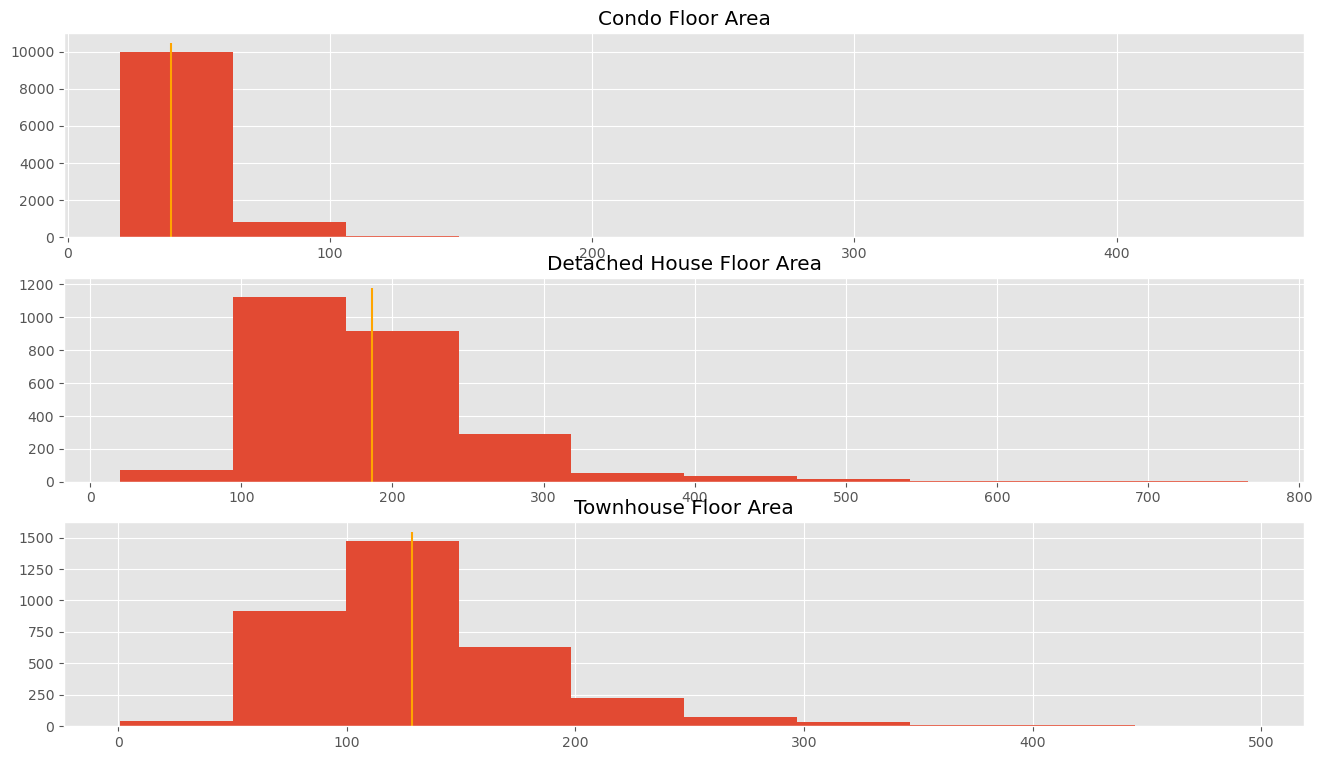

In [30]:
# Establish figure size.
plt.figure(figsize = (16,9))

# We can create subplots, which allows us to have multiple subplots in the same plot.
# plt.subplot(3, 1, 1) means we have 3 rows, 1 column, and are referencing plot 1.
# ax.vlines adds vertical lines in the charts. 
# ymin and ymax are positional args. get_ylim() gets y-axis view limits as a tuple to assign to ymin and ymax
ax1 = plt.subplot(3, 1, 1)
ax1.set_title('Condo Floor Area')
ax1.hist(df[df['property_type'] == 'Condo']['floor_area'])
ymin1, ymax1 = ax1.get_ylim()
ax1.vlines(x = df[df['property_type'] == 'Condo']['floor_area'].mean(), ymin = ymin1, ymax = ymax1, color = 'orange');

# plt.subplot(3, 1, 2) means we have 3 rows, 1 column, and are referencing plot 2.
ax2 = plt.subplot(3, 1, 2)
ax2.set_title('Detached House Floor Area')
ax2.hist(df[df['property_type'] == 'Detached House']['floor_area'])
ymin2, ymax2 = ax2.get_ylim()
ax2.vlines(x = df[df['property_type'] == 'Detached House']['floor_area'].mean(), ymin = ymin2, ymax = ymax2, color = 'orange');

# plt.subplot(3, 1, 3) means we have 3 rows, 1 column, and are referencing plot 3.
ax3 = plt.subplot(3, 1, 3)
ax3.set_title('Townhouse Floor Area')
ax3.hist(df[df['property_type'] == 'Townhouse']['floor_area'])
ymin3, ymax3 = ax3.get_ylim()
ax3.vlines(x = df[df['property_type'] == 'Townhouse']['floor_area'].mean(), ymin = ymin3, ymax = ymax3, color = 'orange');

In [32]:
df.groupby(['property_type'])['floor_area'].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Condo,10843.0,39.299917,15.735678,20.0,29.0,35.0,46.00,450.0
Detached House,2516.0,186.333863,73.474740,20.0,143.0,171.0,211.25,766.0
Townhouse,3412.0,128.487397,53.758378,1.0,95.0,116.0,152.00,494.0


In [42]:
df[df['floor_area'] == 450]

df[df['address'] == 'Soi Ramindhra 78, Nawamin Road - Ramintra Road']

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price,is_train
35,10880059,Bangkok,Khan Na Yao,Ram Inthra,"Soi Ramindhra 78, Nawamin Road - Ramintra Road",Condo,2568.0,1.0,1.0,22,...,0,None,20.0,19.0,13,2012,December,"[Car Park, Covered car park, CCTV, Gymnasium r...",990000.0,1
1647,10871033,Bangkok,Khan Na Yao,Ram Inthra,"Soi Ramindhra 78, Nawamin Road - Ramintra Road",Condo,2568.0,1.0,1.0,25,...,0,None,20.0,19.0,13,2012,December,"[Car Park, Covered car park, CCTV, Gymnasium r...",1390000.0,1
2843,10848459,Bangkok,Khan Na Yao,Ram Inthra,"Soi Ramindhra 78, Nawamin Road - Ramintra Road",Condo,2568.0,1.0,1.0,25,...,0,None,20.0,19.0,13,2012,December,"[Car Park, Covered car park, CCTV, Gymnasium r...",1250000.0,1
2887,10924434,Bangkok,Khan Na Yao,Ram Inthra,"Soi Ramindhra 78, Nawamin Road - Ramintra Road",Condo,2568.0,1.0,1.0,450,...,0,None,20.0,19.0,13,2012,December,"[Car Park, Covered car park, CCTV, Gymnasium r...",1150000.0,1
3356,10034370,Bangkok,Khan Na Yao,Ram Inthra,"Soi Ramindhra 78, Nawamin Road - Ramintra Road",Condo,2568.0,1.0,2.0,43,...,0,None,20.0,19.0,13,2012,December,"[Car Park, Covered car park, CCTV, Gymnasium r...",2250000.0,1
3390,10980124,Bangkok,Khan Na Yao,Ram Inthra,"Soi Ramindhra 78, Nawamin Road - Ramintra Road",Condo,2568.0,1.0,1.0,25,...,0,None,20.0,19.0,13,2012,December,"[Car Park, Covered car park, CCTV, Gymnasium r...",1390000.0,1
3682,10332962,Bangkok,Khan Na Yao,Ram Inthra,"Soi Ramindhra 78, Nawamin Road - Ramintra Road",Condo,2568.0,1.0,1.0,23,...,0,None,20.0,19.0,13,2012,December,"[Car Park, Covered car park, CCTV, Gymnasium r...",1080000.0,1
4352,10886082,Bangkok,Khan Na Yao,Ram Inthra,"Soi Ramindhra 78, Nawamin Road - Ramintra Road",Condo,2568.0,1.0,1.0,22,...,0,None,20.0,19.0,13,2012,December,"[Car Park, Covered car park, CCTV, Gymnasium r...",950000.0,1
8202,10985710,Bangkok,Khan Na Yao,Ram Inthra,"Soi Ramindhra 78, Nawamin Road - Ramintra Road",Condo,2568.0,1.0,1.0,25,...,0,None,20.0,19.0,13,2012,December,"[Car Park, Covered car park, CCTV, Gymnasium r...",1250000.0,1
8951,11031958,Bangkok,Khan Na Yao,Ram Inthra,"Soi Ramindhra 78, Nawamin Road - Ramintra Road",Condo,2568.0,1.0,1.0,25,...,0,None,20.0,19.0,13,2012,December,"[Car Park, Covered car park, CCTV, Gymnasium r...",1400000.0,1


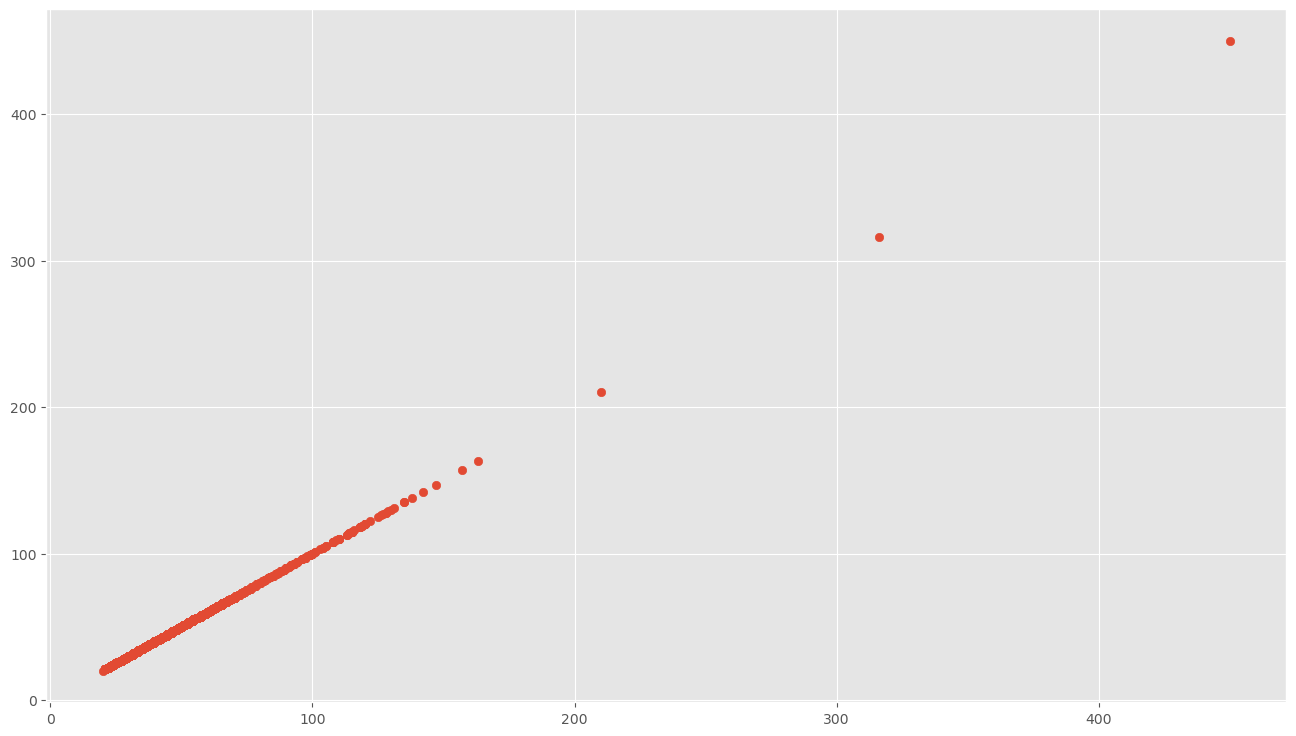

In [46]:
# Establish the size of the figure.
plt.figure(figsize = (16, 9))

# Create scatterplot of high prices versus volume.

plt.scatter(df[df['property_type'] == 'Condo']['floor_area'],df[df['property_type'] == 'Condo']['floor_area']);

# plt.title("High Daily Prices versus Daily Trading Volume")
# plt.ylabel("Daily Trading Volume", fontsize = 20)
# plt.xlabel("High Daily Price", fontsize = 20);

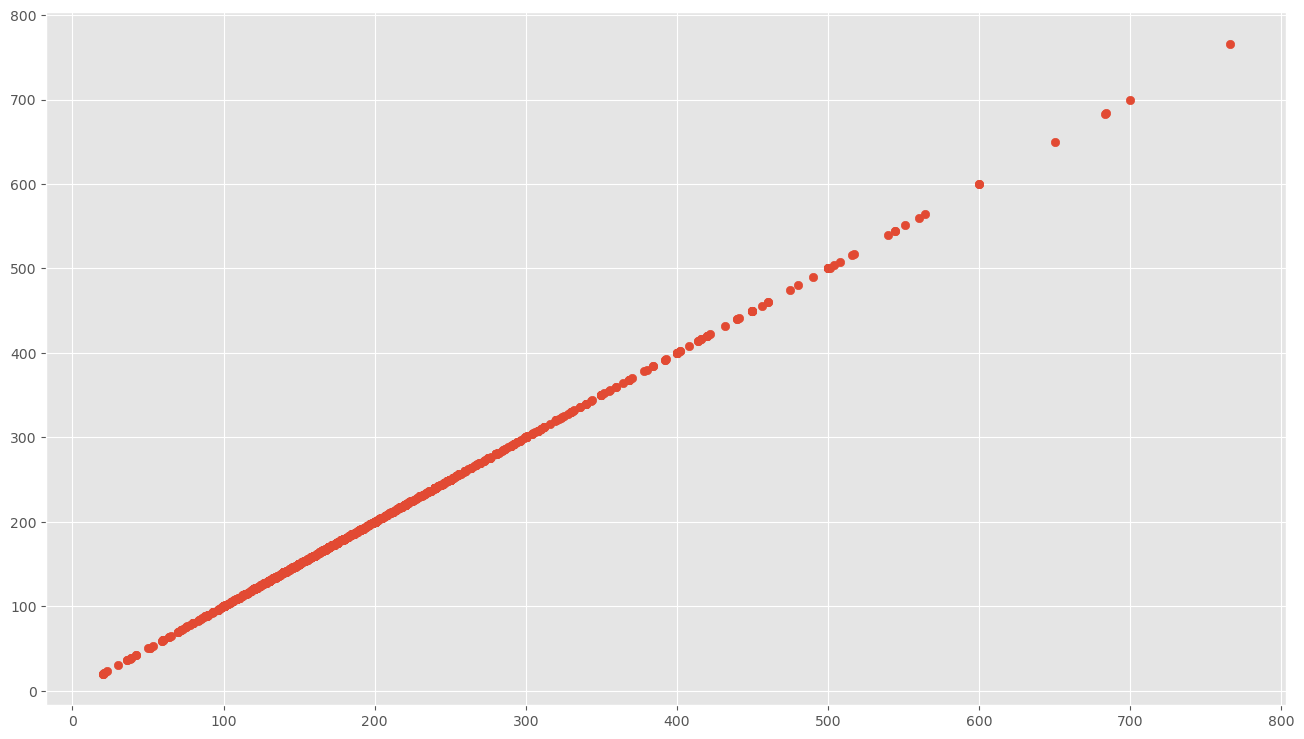

In [48]:
# Establish the size of the figure.
plt.figure(figsize = (16, 9))

# Create scatterplot of high prices versus volume.

plt.scatter(df[df['property_type'] == 'Detached House']['floor_area'],df[df['property_type'] == 'Detached House']['floor_area']);

# plt.title("High Daily Prices versus Daily Trading Volume")
# plt.ylabel("Daily Trading Volume", fontsize = 20)
# plt.xlabel("High Daily Price", fontsize = 20);

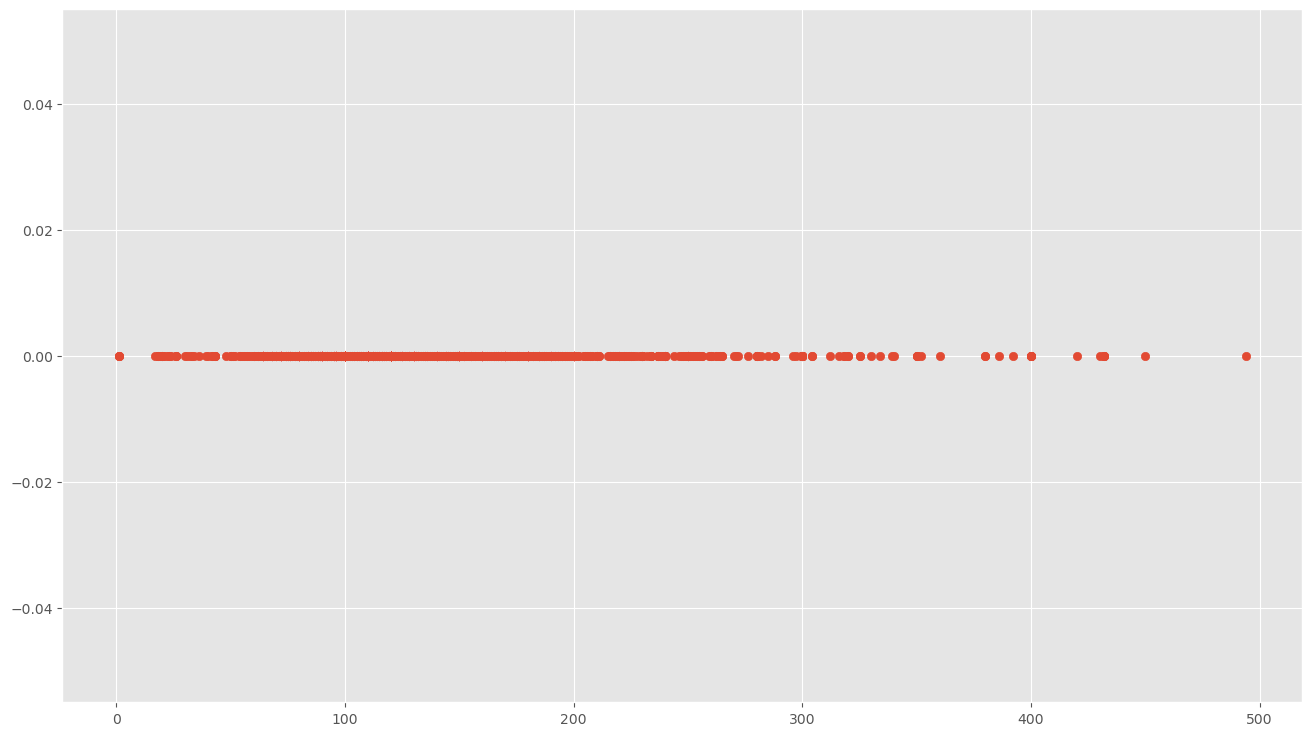

In [62]:
# Establish the size of the figure.
plt.figure(figsize = (16, 9))

# Create scatterplot of high prices versus volume.

plt.scatter(df[df['property_type'] == 'Townhouse']['floor_area'],np.zeros(len(df[df['property_type'] == 'Townhouse'])));

# plt.title("High Daily Prices versus Daily Trading Volume")
# plt.ylabel("Daily Trading Volume", fontsize = 20)
# plt.xlabel("High Daily Price", fontsize = 20);